In [ ]:
# Code based on termpaper 2019 by Ashesh and Anders Høst

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# load data
df_insertion = pd.read_pickle(r"..\data\benchmark_results_insertion.pkl")
df_bubble = pd.read_pickle(r"..\data\bubble_sort_n8.pkl")
df_merge = pd.read_pickle(r"..\data\benchmark_results_mergesort.pkl")
df_quick = pd.read_pickle(r"..\data\quick_sort_n2.pkl")
df_combined = pd.read_pickle(r"..\data\benchmark_results_combined_n100.pkl")



In [8]:
sns.set(rc={"figure.figsize":(84/25.4,84/25.4)})
sns.set_style("whitegrid")

In [9]:
sns.set(style="whitegrid", rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9) 
color = sns.color_palette("Set2", 6)

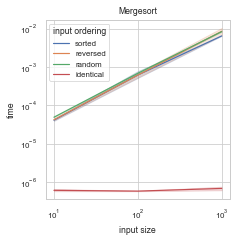

In [16]:
fig_merge = sns.lineplot(x="input size", y="time", data=df_merge, 
                         hue="input ordering")
plt.xscale("log")
plt.yscale("log")
plt.title('Mergesort')
fig_merge = fig_merge.get_figure()
#fig_merge.savefig("Mergesort.pdf")

In [17]:
# Concatenate

frames = [df_merge, df_combined, df_insertion]
df_all = pd.concat(frames, axis=0)

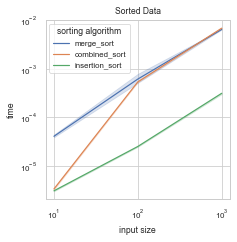

In [63]:
# Plot sorted

df_all_sorted = df_all[df_all["input ordering"] == "sorted"]
fig_sorted = sns.lineplot(x="input size", y='time', hue="sorting algorithm",
                         data=df_all_sorted)
plt.title("Sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_sorted = fig_sorted.get_figure()
fig_sorted.savefig("sorted_plot1000.pdf")

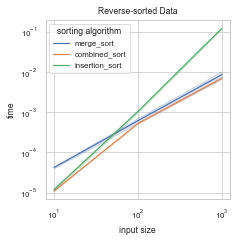

In [64]:
# Plot reversed

df_all_reversed = df_all[df_all["input ordering"] == "reversed"]
fig_reversed = sns.lineplot(x="input size", y='time', 
                            hue="sorting algorithm",
                            data=df_all_reversed)
plt.title("Reverse-sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_reversed = fig_reversed.get_figure()
fig_reversed.savefig("reversed_plot1000.pdf")

PermissionError: [Errno 13] Permission denied: 'random_plot1000.pdf'

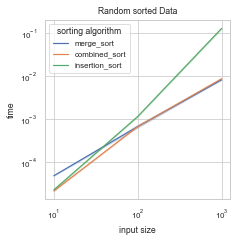

In [68]:
# Plot random

df_all_random = df_all[df_all["input ordering"] == "random"]
fig_random = sns.lineplot(x="input size", y='time', 
                            hue="sorting algorithm",
                            data=df_all_random)
plt.title("Random sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_random = fig_random.get_figure()
fig_random.savefig("random_plot1000.pdf")

In [64]:
pd.options.display.max_columns = 55
pd.set_option('display.max_rows', 999)

In [80]:
# load data
df_insertion = pd.read_pickle(r"..\data\benchmark_results_insertion.pkl")
df_bubble = pd.read_pickle(r"..\data\bubble_sort_n8.pkl")
df_merge = pd.read_pickle(r"..\data\benchmark_results_mergesort.pkl")
df_quick = pd.read_pickle(r"..\data\quick_sort_n2048.pkl")
df_combined = pd.read_pickle(r"..\data\benchmark_results_combined_n100.pkl")

frames = [df_insertion, df_merge, df_combined]
frames = [df_insertion, df_bubble, df_merge, df_quick, df_combined]

# Replacing inconsistant column names in the saved data with same for all
for frame in frames:
    frame.columns = df_insertion.columns

# Concatonating all benchmarking dataframes into one
df_all_frames = pd.concat(frames, axis=0, ignore_index=True)

In [81]:
df_all_frames

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,insertion_sort,3.081907e-06
1,sorted,10,2,insertion_sort,3.168074e-06
2,sorted,10,3,insertion_sort,3.054177e-06
3,sorted,10,4,insertion_sort,2.970573e-06
4,sorted,10,5,insertion_sort,3.209228e-06
5,sorted,100,1,insertion_sort,2.588814e-05
6,sorted,100,2,insertion_sort,2.480600e-05
7,sorted,100,3,insertion_sort,2.498740e-05
8,sorted,100,4,insertion_sort,2.588154e-05
9,sorted,100,5,insertion_sort,2.481226e-05


Figure(1152x432)
Figure(1152x432)
Figure(1152x432)


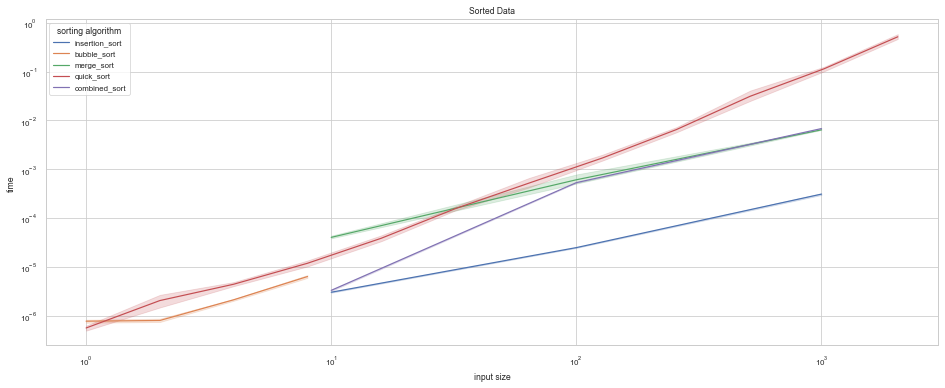

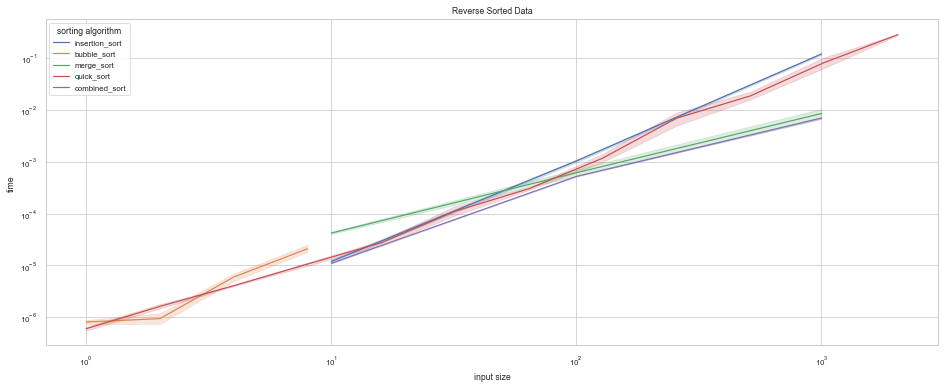

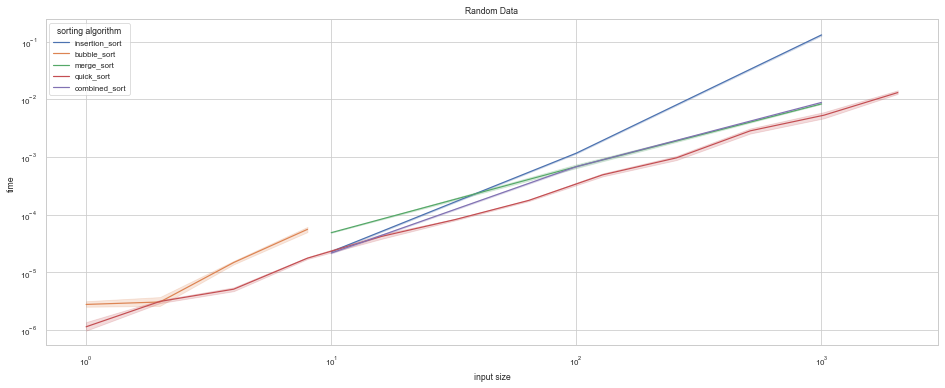

In [88]:
# Plot Categories
input_ordering = {'Sorted Data':'sorted','Reverse Sorted Data': 'reversed','Random Data': 'random'}

for title, order in  input_ordering.items():

    df_order_temp = df_all_frames[df_all_frames["input ordering"] == order]
    plt.figure(figsize=(16, 6))

    fig = sns.lineplot(x="input size", y='time', hue="sorting algorithm",
                         data=df_order_temp)
    plt.title(title)
    plt.xscale("log")
    plt.yscale("log")
    fig = fig.get_figure()
#     fig_sorted.savefig("sorted_plot1000.pdf")
    print(fig)


In [73]:
# Plot Categories
input_ordering = {'Sorted Data':'sorted','Reverse Sorted Data': 'reversed','Random Data': 'random'}


In [76]:
for title, order in input_ordering.items():
    print(title)

Sorted Data
Reverse Sorted Data
Random Data
